# Код, демонстрирующий аппроксимацию $\gamma$-спектра
В верхней ячейке - "Чистый ROOT"

Welcome to JupyROOT 6.31/01
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      199.049
NDf                       =           45
Edm                       =  2.80228e-06
NCalls                    =          270
p0                        =      8638.37   +/-   93.3468      	 (limited)
p1                        =      1334.72   +/-   0.015227     	 (limited)
p2                        =      1.39353   +/-   0.0124065    	 (limited)
p3                        =      299.284   +/-   31.7953     
p4                        =    -0.219179   +/-   0.0238641   
Area: 8638.367528 +- 93.346780
Pos: 1334.715374 +- 0.015227
Sigma: 1.393534 +- 0.012407



Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


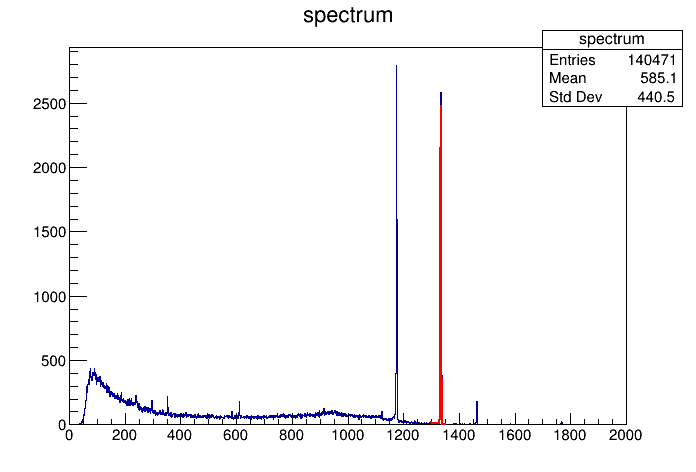

In [1]:
import ROOT
ROOTFile=ROOT.TFile("spectrum.root")
spectrum=ROOTFile.Get("spectrum")

fit=ROOT.TF1("Fit","gausn(0)+pol1(3)",1300.0,1350.0)
fit.SetParameter(0,spectrum.GetMaximum())
fit.SetParLimits(0,0,1e6)
fit.SetParameter(1,1332)
fit.SetParLimits(1,1310.0,1350.0)
fit.SetParameter(2,2)
fit.SetParLimits(2,0,20)

spectrum.Fit(fit,"R","",1300.0,1350.0)
print("Area: %f +- %f\nPos: %f +- %f\nSigma: %f +- %f\n" % (fit.GetParameter(0),fit.GetParError(0),fit.GetParameter(1),fit.GetParError(1),\
                                                            fit.GetParameter(2),fit.GetParError(2)))
canvas=ROOT.TCanvas()
spectrum.Draw("hist")
fit.Draw("same")
canvas.Draw()


В нижнеей ячейке - код, использующий библиотеку rootfitlib, позволяющий в графическом режиме редактировать функцию

In [2]:
import ROOT
%jsroot on
ROOTFile=ROOT.TFile("spectrum.root")
spectrum=ROOTFile.Get("spectrum")
m=ROOT.FitManager.GetPointer()
m.ReadFromTXT("fits.txt")
fit=m.FindFunction("FitFunction")
if not fit:
    fit=m.BookFunction("FitFunction","gausn(0)+pol1(3)",1300.0,1350.0)
    fit.SetParameter(0,spectrum.GetMaximum())
    fit.SetParLimits(0,0,1e6)
    fit.SetParameter(1,1332)
    fit.SetParLimits(1,1310.0,1350.0)
    fit.SetParameter(2,2)
    fit.SetParLimits(2,0,20)
fit.Fit(spectrum,True)
print("Area: %f +- %f\nPos: %f +- %f\nSigma: %f +- %f\n" % (fit.GetParameter(0),fit.GetParError(0),fit.GetParameter(1),fit.GetParError(1),\
                                                            fit.GetParameter(2),fit.GetParError(2)))
canvas=ROOT.TCanvas()
fit.Draw()
canvas.Draw()

m.SaveToTXT("fits.txt")
m.PrintToPDF("fits.pdf")
m.SaveToROOT("fits.root")

Area: 2473.002111 +- 72.219542
Pos: 1334.715379 +- 0.032025
Sigma: 1.393538 +- 0.026097

parameters.size(): 0
parameters.size(): 1
parameters.size(): 2
parameters.size(): 3
parameters.size(): 4
parameters.size(): 5
parameters.size(): 5
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      199.049
NDf                       =           45
Edm                       =  1.83638e-10
NCalls                    =           73
p0                        =         2473   +/-   34.3385      	 (limited)
p1                        =      1334.72   +/-   0.015227     	 (limited)
p2                        =      1.39354   +/-   0.0124083    	 (limited)
p3                        =      299.241   +/-   31.7954     
p4                        =    -0.219147   +/-   0.0238642   
111111: FitFunction gaus(0)+pol1(3)
parameters.size: 5
111111: FitFunction gaus(0)+pol1(3)
parameters.size: 5


Warning in <TF1::AddToGlobalList>: Function is supposed to be in the global list but it is not present
Info in <TCanvas::Print>: pdf file fits.pdf has been created
Info in <TCanvas::Print>: Current canvas added to pdf file fits.pdf
Info in <TCanvas::Print>: pdf file fits.pdf has been closed
Error in <TFile::ReOpen>: mode must be either READ or UPDATE, not RECREATE


Для запуска графического режима нужно:
1. Зайти в root
2. Выполнить команду "m=FitManager::GetPointer("fits.root")"
3. ff=m->FindFunction("FitFunction")
4. ff->LaunchGUI()